<a href="https://colab.research.google.com/github/as2c/MLP---Cosmology/blob/NewData/Optimization2/KNN_data2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code, our objective is to train some classic models such as SVM, KNN, RandomForest, etc on our test data, and try to evaluate their efficiency by plotting confusion matrixes, learning curves, validation curves, and measuring the prediction time. 

# Import phase I data

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import timeit
import time
%alias_magic t timeit
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Gadget 2 Data / with Neutrino

In [3]:
data = pd.read_csv(r'/content/drive/MyDrive/denc_Neutrino')
# data['in_halo'] = (data['haloID']>0).astype('int')
data['in_halo'] = (data['halo_mass']>1600).astype('int32')
data

,id,haloID,halo_mass,vx,vy,vz,dc for 4.9,dc for 6.8,dc for 8.7,dc for 10.6,dc for 12.4,dc for 14.3,dc for 16.2,dc for 18.1,dc for 20.0,in_halo
0,10156552,755,2280.0,171.21194,220.56293,-274.228700,-0.084922,-0.052028,-0.042415,-0.028087,-0.024984,-0.018675,-0.016231,-0.011940,-0.010111,1
1,11068486,85,1539.0,-129.84116,92.60424,212.125500,-0.127820,-0.081099,-0.051217,-0.028345,-0.013751,-0.013991,-0.012344,-0.011500,-0.012220,0
2,9530036,654,1944.0,-290.99210,-885.49430,468.255040,-0.078978,-0.052806,-0.030027,-0.011704,0.001295,0.003803,0.005131,0.005231,0.003787,1
3,11455022,752,1394.0,-60.35258,422.43716,79.394300,-0.109989,-0.079155,-0.054663,-0.037685,-0.026670,-0.017901,-0.009227,-0.000868,0.001568,0
4,8591034,356,1649.0,403.66608,345.88077,9.231552,-0.084405,-0.019068,-0.009396,-0.001539,0.002288,0.005629,0.011288,0.013111,0.013433,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2160800,451,2634.0,654.82430,210.78130,255.344150,-0.094225,-0.076043,-0.060624,-0.040368,-0.020840,-0.016261,-0.011803,-0.005002,0.000918,1
99996,3257728,43,1112.0,-154.27774,488.65564,-779.558400,-0.127045,-0.076529,-0.056246,-0.038201,-0.027520,-0.016374,-0.008045,0.002627,0.006124,0
99997,6101605,484,1198.0,-113.51735,68.44336,275.964000,-0.122135,-0.091794,-0.063465,-0.032060,-0.017973,-0.016684,-0.017740,-0.017154,-0.012600,0
99998,4576456,44,1058.0,-130.21120,292.63483,-754.563000,-0.097585,-0.076140,-0.061788,-0.054584,-0.043055,-0.032415,-0.021591,-0.007463,0.004673,0


In [4]:
data.describe()

,id,haloID,halo_mass,vx,vy,vz,dc for 4.9,dc for 6.8,dc for 8.7,dc for 10.6,dc for 12.4,dc for 14.3,dc for 16.2,dc for 18.1,dc for 20.0,in_halo
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.716004e+06,424.627710,2369.299450,35.207601,-13.728656,97.821939,-0.107338,-0.062074,-0.038666,-0.025951,-0.017900,-0.011968,-0.007224,-0.003341,-0.000224,0.557930
std,3.549230e+06,230.962533,1856.527585,364.820655,369.919751,373.578625,0.020301,0.020965,0.019921,0.018106,0.015956,0.013969,0.012346,0.011069,0.010084,0.496635
min,2.131444e+06,16.000000,241.000000,-1247.932500,-1462.806300,-1250.519700,-0.127820,-0.099572,-0.083351,-0.072824,-0.065316,-0.058751,-0.050519,-0.043771,-0.038371,0.000000
25%,5.953820e+06,238.000000,1194.000000,-226.284345,-254.656135,-145.829085,-0.124202,-0.077891,-0.052474,-0.038510,-0.028860,-0.021233,-0.015384,-0.010712,-0.006964,0.000000
50%,9.043250e+06,418.000000,1791.000000,32.857450,-4.815737,101.883413,-0.113607,-0.063404,-0.039434,-0.026100,-0.017784,-0.011980,-0.007369,-0.003743,-0.000713,1.000000
75%,1.176120e+07,619.000000,2945.000000,284.168098,238.543252,350.062135,-0.095776,-0.048722,-0.025370,-0.013587,-0.006677,-0.002087,0.001081,0.004249,0.006694,1.000000
max,1.464652e+07,870.000000,10101.000000,1314.092800,1256.822900,1355.984900,0.017155,0.032463,0.044346,0.040490,0.042179,0.036009,0.033482,0.034145,0.032602,1.000000


## Define Datasets

In [7]:
## Neutrino
X = data.iloc[:,3:15].astype('float32').values
Y = data.in_halo.astype('int32').values

In [9]:
## Scale / Neutrino
X = (X - np.mean(X))/np.std(X)

In [11]:
## Split into test and train / Neutrino

tst_size = 0.2
ns, nf = np.shape(X) 
X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
print('X_train :',len(X_train),'   X_test :',len(X_test))

X_train : 80000    X_test : 20000


In [13]:
# Frequency of 1-class / Neutrino
print("{} % of the stored data has class 1 ".format(100*Y.sum()/len(Y)))

55.793 % of the stored data has class 1 


## Gadget 2 Data / without Neutrino

In [5]:
data_cdm = pd.read_csv(r'/content/drive/MyDrive/denc_CDM')
data_cdm['in_halo'] = (data_cdm['halo_mass']>1600).astype('int32')
data_cdm

,id,haloID,halo_mass,vx,vy,vz,dc for 4.9,dc for 6.8,dc for 8.7,dc for 10.6,dc for 12.4,dc for 14.3,dc for 16.2,dc for 18.1,dc for 20.0,in_halo
0,8981131,414,1504.0,252.710050,-464.239500,509.94550,2.817576,2.780794,2.746420,2.446413,2.000415,1.533108,1.083378,0.691070,0.457584,0
1,9901676,1026,1013.0,-167.701370,499.161740,156.32635,2.690323,2.102417,1.805493,1.485764,1.267945,1.083753,0.849938,0.617267,0.431845,0
2,8288987,1079,727.0,46.129280,19.954561,164.61870,1.010590,0.821528,0.559744,0.220796,0.003400,-0.094805,-0.074599,0.003315,0.076079,0
3,4842631,675,1268.0,-234.629320,349.021400,-690.46674,1.889611,1.180236,0.495534,0.064434,-0.232441,-0.389582,-0.407908,-0.334146,-0.231578,0
4,12884124,437,6128.0,146.780670,-180.209270,-558.39777,2.676619,1.734870,0.906903,0.464721,0.187801,0.057663,0.029529,0.049055,0.101472,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12466311,1085,5542.0,25.253933,-580.586850,113.06337,1.482403,1.068278,0.857863,0.583947,0.327563,0.212553,0.139374,0.103515,0.090791,1
99996,11857185,491,691.0,-423.371550,138.109020,-300.80450,-0.209077,-0.534490,-0.724460,-0.749430,-0.743152,-0.663805,-0.511928,-0.347015,-0.253660,0
99997,9340191,947,868.0,225.385210,-9.085627,318.22006,1.086942,0.492283,0.114506,-0.050883,-0.161068,-0.168421,-0.159639,-0.175261,-0.202931,0
99998,13317963,1034,1175.0,-55.431606,16.332230,-898.90326,0.339088,-0.085185,-0.248881,-0.328230,-0.343797,-0.306353,-0.275684,-0.282089,-0.284524,0


In [6]:
data_cdm.describe()

,id,haloID,halo_mass,vx,vy,vz,dc for 4.9,dc for 6.8,dc for 8.7,dc for 10.6,dc for 12.4,dc for 14.3,dc for 16.2,dc for 18.1,dc for 20.0,in_halo
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.533738e+06,633.075900,3004.391080,32.287533,-13.697343,89.574071,1.423915,1.032233,0.712873,0.480862,0.322917,0.216223,0.144046,0.096634,0.066060,0.589200
std,3.598448e+06,358.496156,2802.876192,359.880883,364.383569,374.571567,1.023549,0.920945,0.807251,0.689640,0.585773,0.502089,0.436403,0.384151,0.341271,0.491981
min,2.131195e+06,3.000000,271.000000,-1234.874100,-1571.376600,-1311.024700,-0.994127,-0.912349,-0.878283,-0.891915,-0.933043,-0.935449,-0.868262,-0.815454,-0.787467,0.000000
25%,5.640789e+06,368.000000,1181.000000,-223.982345,-249.685410,-148.388917,0.660156,0.354545,0.122621,-0.026842,-0.107359,-0.161173,-0.183527,-0.186967,-0.181568,0.000000
50%,8.790886e+06,676.000000,2020.000000,28.124724,-4.978945,97.944227,1.269011,0.890765,0.589027,0.370513,0.223129,0.134561,0.074502,0.037988,0.011761,1.000000
75%,1.143724e+07,970.000000,3662.000000,277.156240,231.618633,341.305498,2.057976,1.549992,1.162333,0.872826,0.674880,0.526476,0.422276,0.353801,0.294427,1.000000
max,1.464654e+07,1251.000000,31252.000000,1362.093800,1185.835400,1349.211900,5.624963,4.721646,3.972765,3.400808,2.783131,2.163220,1.888203,1.618024,1.364662,1.000000


## Define Datasets

In [8]:
## CDM
X2 = data_cdm.iloc[:,3:15].astype('float32').values
Y2 = data_cdm.in_halo.astype('int32').values

In [10]:
## Scale / CDM
X2 = (X2 - np.mean(X2))/np.std(X2)

In [12]:
## Split into test and train / CDM

tst_size = 0.2
ns, nf = np.shape(X) 
X2_train, X2_test, Y2_train, Y2_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
print('X2_train :',len(X2_train),'   X2_test :',len(X2_test))

X2_train : 80000    X2_test : 20000


In [14]:
# Frequency of 1-class / CDM
print("{} % of the stored data has class 1 ".format(100*Y2.sum()/len(Y2)))

58.92 % of the stored data has class 1 


# KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, weights='uniform', 
                                  algorithm='auto', leaf_size = 30, p = 2, metric='minkowski', metric_params = None)
#check
%t classifier.fit(X_train , Y_train)

#Testing the classification on the test sample
Y_predict_knn = classifier.predict(X_test)
#check
%t Y_predict_knn = classifier.predict(X_test)

100 loops, best of 5: 14.6 ms per loop
1 loop, best of 5: 3.17 s per loop


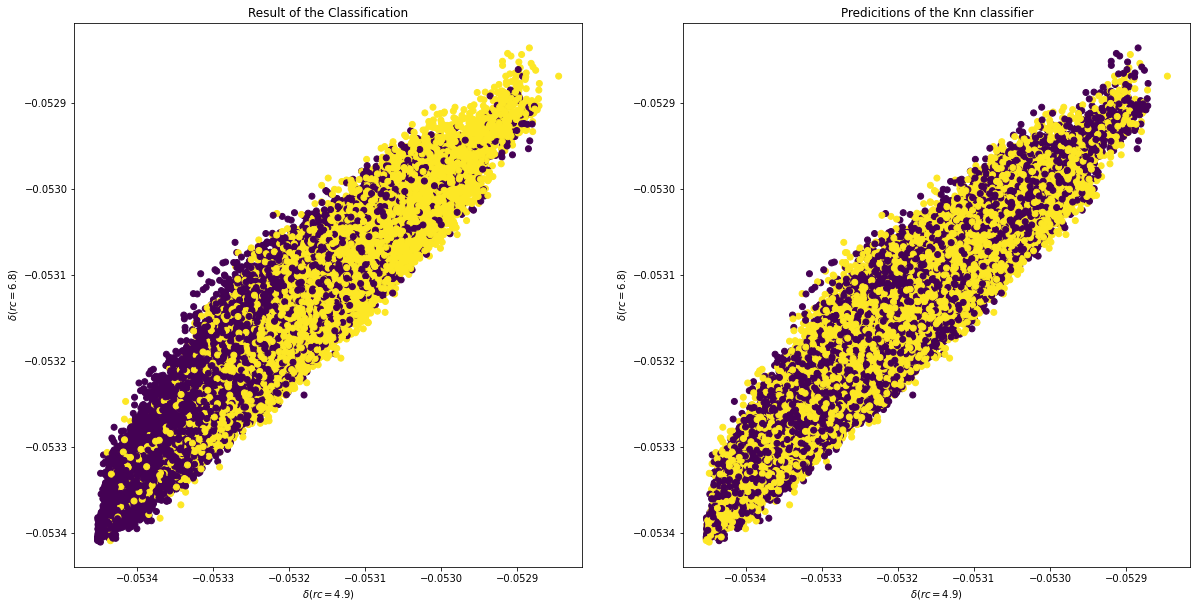

In [69]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$\delta(rc=4.9)$', ylabel='$\delta(rc=6.8)$' , title = 'Result of the Classification')

ax.scatter(*X_test[:,6:8].T, c=Y_test)    

ax = fig.add_subplot(122 , xlabel = '$\delta(rc=4.9)$', ylabel='$\delta(rc=6.8)$' , title = 'Predicitions of the Knn classifier')
plt.scatter(*X_test[:,6:8].T, c = Y_predict_knn)
plt.show()


plt.show()

In [70]:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_knn)
print(clf_report)

              precision    recall  f1-score   support

           0       0.51      0.50      0.50     40168
           1       0.61      0.62      0.62     50832

    accuracy                           0.57     91000
   macro avg       0.56      0.56      0.56     91000
weighted avg       0.57      0.57      0.57     91000



### Validation Curve

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59]


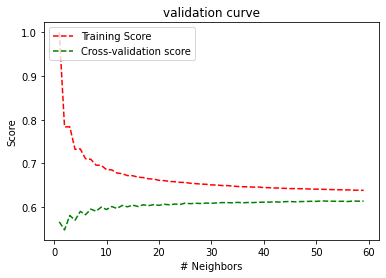

In [71]:
from sklearn.model_selection import validation_curve


param_range = np.arange(1,60, 1)
print(param_range)

train_scores, test_scores = validation_curve(
classifier, X=X, y=Y,cv=5, param_name="n_neighbors", param_range=param_range,
scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('# Neighbors')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()

Optimal value of $n_{neighbor}$ = 60

### Run-Time vs. leaf-size



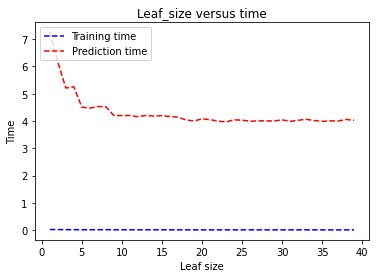

In [72]:
import time

leaf_range = np.arange(1,40,1)

t_time = np.array([])
p_time = np.array([])

for i in leaf_range:
    # print(i)
    classifier = KNeighborsClassifier(n_neighbors=20 , leaf_size=i, p=2, metric='minkowski')
    
    start = time.time()
    classifier.fit(X_train, Y_train)
    stop = time.time()
    t1 = stop - start
    t_time = np.append(t_time , t1)
    
    start = time.time()
    n = classifier.predict(X_test)
    stop = time.time()
    t2 = stop - start
    p_time = np.append(p_time , t2)
    
plt.plot(leaf_range , t_time , 'b--' , label = 'Training time')
plt.plot(leaf_range , p_time , 'r--' , label = 'Prediction time')
plt.title('Leaf_size versus time')
plt.xlabel('Leaf size')
plt.ylabel('Time')
plt.legend(loc='upper left')
plt.show()

### Learning Curve

learning started


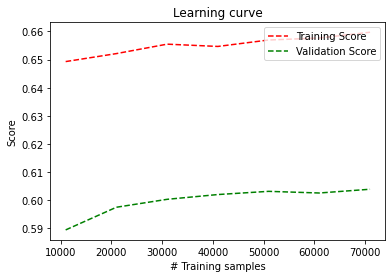

In [29]:
from sklearn.model_selection import learning_curve, validation_curve
import pandas as pd
train_sizes = np.arange(1000,80000,10000)

print('learning started')
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator= classifier , X = X,
                                                   y = Y, train_sizes = train_sizes, cv = 5, random_state = 0)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plt.title('Learning curve')
plt.plot(ns_list[1:], train_scores_mean[1:],'r--',label = 'Training Score')
plt.plot(ns_list[1:], validation_scores_mean[1:], 'g--', label = 'Validation Score')
plt.xlabel('# Training samples')
plt.ylabel('Score')
plt.legend(loc='upper right')

plt.show()

### Fine Tuning The Model




In [30]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, train_size = 0.09 , random_state= 0)

In [73]:
classifier = KNeighborsClassifier(n_neighbors=40 , leaf_size=30 , p=2, metric='minkowski')
start = time.time()
%t classifier.fit(X_train , Y_train)
runtime_train = time.time() - start
#Testing the classification on the test sample
start = time.time()
%t Y_predict_knn = classifier.predict(X_test)
runtime_pred = time.time() - start
Y_predict_knn = classifier.predict(X_test)
print(len(Y_test))
print(len(Y_predict_knn[Y_predict_knn == 1]))

100 loops, best of 5: 14.8 ms per loop
1 loop, best of 5: 4.64 s per loop
91000
53926


In [74]:
from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, Y_predict_knn)
print(clf_report)

              precision    recall  f1-score   support

           0       0.54      0.50      0.52     40168
           1       0.63      0.66      0.64     50832

    accuracy                           0.59     91000
   macro avg       0.58      0.58      0.58     91000
weighted avg       0.59      0.59      0.59     91000



### Metrics


In [75]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test , Y_predict_knn)
print('Here is the confusion matrix for the Knn classifier: \n'  )
print('TP = {}'.format(conf_matrix[0][0]),'  FP = {}'.format(conf_matrix[0][1]) , '\n')
print('FN = {}'.format(conf_matrix[1][0]),'  TN = {}'.format(conf_matrix[1][1]) , '\n')

Here is the confusion matrix for the Knn classifier: 

TP = 19963   FP = 20205 

FN = 17111   TN = 33721 



Confusion matrix, without normalization
[[19963 20205]
 [17111 33721]]
Normalized confusion matrix
[[0.49698765 0.50301235]
 [0.33661867 0.66338133]]


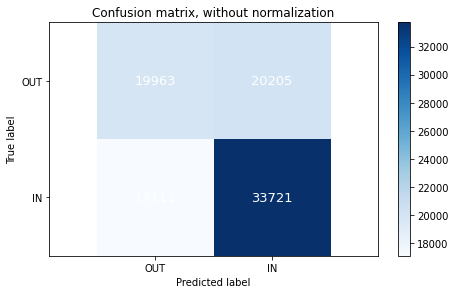

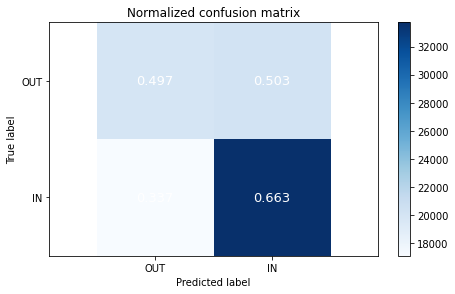

In [76]:
import itertools

class_names = {'IN' , 'OUT'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    #, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment='center',
                 verticalalignment='center',
                 #transform=ax.transAxes,
                 fontsize = 13,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.axis('equal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Accuracy

In [77]:
acurracy = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
print('The accuracy of the model is {}%' .format(round(acurracy*100, 3)))

The accuracy of the model is 58.993%


### Recall

In [78]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(Y_test, Y_predict_knn, pos_label=0)
precision = precision_score(Y_test, Y_predict_knn, pos_label = 0)
print(f"The recall for the Knn classifier: \n {round(recall,3)}"  )
print(f"The precision for Knn classifier: \n {round(precision,3)}"  )

The recall for the Knn classifier: 
 0.497
The precision for Knn classifier: 
 0.538


### Precision - Recall curve

[[0.425 0.575]
 [0.575 0.425]
 [0.45  0.55 ]
 ...
 [0.65  0.35 ]
 [0.4   0.6  ]
 [0.4   0.6  ]]
[1 0 1 ... 0 1 1]


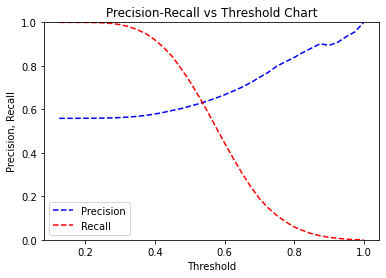

In [38]:
Y_probs=classifier.predict_proba(X_test) 
print(Y_probs)
print(Y_predict_knn)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(Y_test , Y_probs[:, 1]) 

#retrieve probability of being 1(in second column of Y_prob)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

In [79]:
from sklearn.metrics import accuracy_score
# print('\nclassification report: \n')
# from sklearn.metrics import classification_report
# print(classification_report(Y_test, Y_pred))

EM1 = 'accuracy'
# mean_test_scores = trained_model.cv_results_.get('mean_test_score')
CVS1 = accuracy_score(Y_train, classifier.predict(X_train))
CPS1 = accuracy_score(Y_test, Y_predict_knn)
T1 = runtime_train
PT1 = runtime_pred
print( "Training Time was: " + str(T1))
print("Prediction Time was: " + str(PT1))

Training Time was: 9.287369728088379
Prediction Time was: 28.82330894470215


# KNN / CDM

In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, weights='uniform', 
                                  algorithm='auto', leaf_size = 30, p = 2, metric='minkowski', metric_params = None)
#check
%t classifier.fit(X2_train , Y2_train)

#Testing the classification on the test sample
Y2_predict_knn = classifier.predict(X2_test)
#check
%t Y2_predict_knn = classifier.predict(X2_test)

1 loop, best of 5: 190 ms per loop
1 loop, best of 5: 825 ms per loop


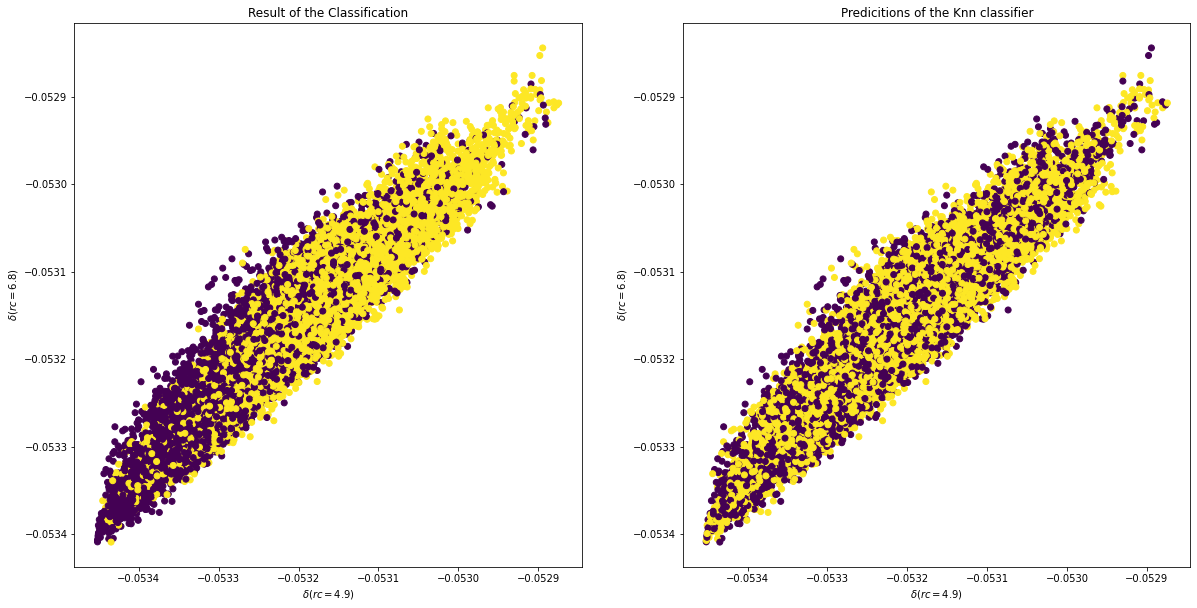

In [43]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121 , xlabel = '$\delta(rc=4.9)$', ylabel='$\delta(rc=6.8)$' , title = 'Result of the Classification')

ax.scatter(*X2_test[:,6:8].T, c=Y2_test)    

ax = fig.add_subplot(122 , xlabel = '$\delta(rc=4.9)$', ylabel='$\delta(rc=6.8)$' , title = 'Predicitions of the Knn classifier')
plt.scatter(*X2_test[:,6:8].T, c = Y2_predict_knn)
plt.show()


plt.show()

In [44]:
from sklearn.metrics import classification_report
clf_report = classification_report(Y2_test, Y2_predict_knn)
print(clf_report)

              precision    recall  f1-score   support

           0       0.52      0.50      0.51      8852
           1       0.62      0.63      0.62     11148

    accuracy                           0.57     20000
   macro avg       0.57      0.57      0.57     20000
weighted avg       0.57      0.57      0.57     20000



### Validation Curve

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59]


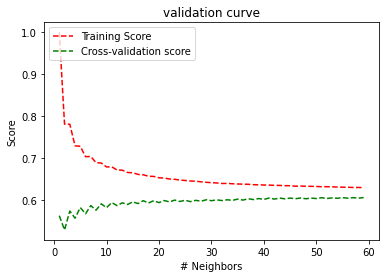

In [46]:
from sklearn.model_selection import validation_curve


param_range = np.arange(1,60, 1)
print(param_range)

train_scores, test_scores = validation_curve(
classifier, X=X2, y=Y2,cv=5, param_name="n_neighbors", param_range=param_range,
scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('# Neighbors')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()

Optimal value of $n_{neighbor}$ = 60

### Run-Time vs. leaf-size



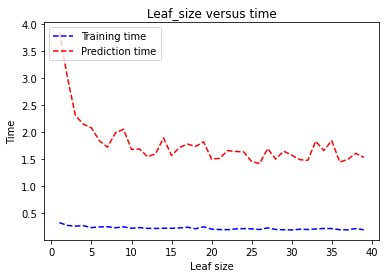

In [49]:
import time

leaf_range = np.arange(1,40,1)

t_time = np.array([])
p_time = np.array([])

for i in leaf_range:
    # print(i)
    classifier = KNeighborsClassifier(n_neighbors=60 , leaf_size=i, p=2, metric='minkowski')
    
    start = time.time()
    classifier.fit(X2_train, Y2_train)
    stop = time.time()
    t1 = stop - start
    t_time = np.append(t_time , t1)
    
    start = time.time()
    n = classifier.predict(X2_test)
    stop = time.time()
    t2 = stop - start
    p_time = np.append(p_time , t2)
    
plt.plot(leaf_range , t_time , 'b--' , label = 'Training time')
plt.plot(leaf_range , p_time , 'r--' , label = 'Prediction time')
plt.title('Leaf_size versus time')
plt.xlabel('Leaf size')
plt.ylabel('Time')
plt.legend(loc='upper left')
plt.show()

### Learning Curve

learning started


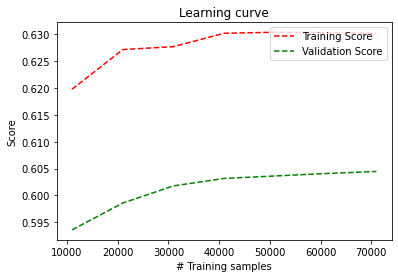

In [50]:
from sklearn.model_selection import learning_curve, validation_curve
import pandas as pd
train_sizes = np.arange(1000,80000,10000)

print('learning started')
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator= classifier , X = X2,
                                                   y = Y2, train_sizes = train_sizes, cv = 5, random_state = 0)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plt.title('Learning curve')
plt.plot(ns_list[1:], train_scores_mean[1:],'r--',label = 'Training Score')
plt.plot(ns_list[1:], validation_scores_mean[1:], 'g--', label = 'Validation Score')
plt.xlabel('# Training samples')
plt.ylabel('Score')
plt.legend(loc='upper right')

plt.show()

### Fine Tuning The Model




In [54]:
X2_train, X2_test, Y2_train, Y2_test  = train_test_split(X2, Y2, train_size = 0.09 , random_state= 0)

In [81]:
classifier = KNeighborsClassifier(n_neighbors=40 , leaf_size=30 , p=2, metric='minkowski')
start = time.time()
%t classifier.fit(X2_train , Y2_train)
runtime_train = time.time() - start
#Testing the classification on the test sample
start = time.time()
%t Y2_predict_knn = classifier.predict(X2_test)
runtime_pred = time.time() - start
Y2_predict_knn = classifier.predict(X2_test)
print(len(Y2_test))
print(len(Y2_predict_knn[Y2_predict_knn == 1]))

100 loops, best of 5: 14.7 ms per loop
1 loop, best of 5: 4.67 s per loop
91000
66099


In [82]:
from sklearn.metrics import classification_report
clf_report = classification_report(Y2_test, Y2_predict_knn)
print(clf_report)

              precision    recall  f1-score   support

           0       0.49      0.33      0.39     37407
           1       0.62      0.76      0.68     53593

    accuracy                           0.59     91000
   macro avg       0.56      0.55      0.54     91000
weighted avg       0.57      0.59      0.57     91000



### Metrics


In [57]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y2_test , Y2_predict_knn)
print('Here is the confusion matrix for the Knn classifier: \n'  )
print('TP = {}'.format(conf_matrix[0][0]),'  FP = {}'.format(conf_matrix[0][1]) , '\n')
print('FN = {}'.format(conf_matrix[1][0]),'  TN = {}'.format(conf_matrix[1][1]) , '\n')

Here is the confusion matrix for the Knn classifier: 

TP = 12302   FP = 25105 

FN = 12599   TN = 40994 



Confusion matrix, without normalization
[[12302 25105]
 [12599 40994]]
Normalized confusion matrix
[[0.32886893 0.67113107]
 [0.23508667 0.76491333]]


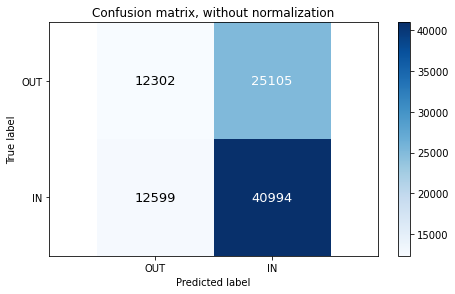

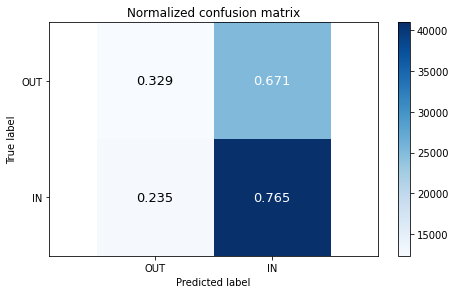

In [58]:
import itertools

class_names = {'IN' , 'OUT'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    #, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment='center',
                 verticalalignment='center',
                 #transform=ax.transAxes,
                 fontsize = 13,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.axis('equal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Accuracy

In [59]:
acurracy = (conf_matrix[0][0]+conf_matrix[1][1])/(conf_matrix[0][0]+conf_matrix[0][1]+conf_matrix[1][0]+conf_matrix[1][1])
print('The accuracy of the model is {}%' .format(round(acurracy*100, 3)))

The accuracy of the model is 58.567%


### Recall

In [60]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(Y2_test, Y2_predict_knn, pos_label=0)
precision = precision_score(Y_test, Y_predict_knn, pos_label = 0)
print(f"The recall for the Knn classifier: \n {round(recall,3)}"  )
print(f"The precision for Knn classifier: \n {round(precision,3)}"  )

The recall for the Knn classifier: 
 0.329
The precision for Knn classifier: 
 0.538


### Precision - Recall curve

[[0.375 0.625]
 [0.35  0.65 ]
 [0.375 0.625]
 ...
 [0.275 0.725]
 [0.475 0.525]
 [0.525 0.475]]
[1 1 1 ... 1 1 0]


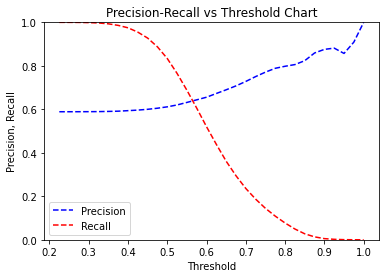

In [61]:
Y2_probs=classifier.predict_proba(X2_test) 
print(Y2_probs)
print(Y2_predict_knn)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(Y2_test , Y2_probs[:, 1]) 

#retrieve probability of being 1(in second column of Y_prob)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.show()

In [83]:
from sklearn.metrics import accuracy_score
# print('\nclassification report: \n')
# from sklearn.metrics import classification_report
# print(classification_report(Y_test, Y_pred))

EM2 = 'accuracy'
# mean_test_scores = trained_model.cv_results_.get('mean_test_score')
CVS2 = accuracy_score(Y2_train, classifier.predict(X2_train))
CPS2 = accuracy_score(Y2_test, Y2_predict_knn)
T2 = runtime_train
PT2 = runtime_pred
print( "Training Time was: " + str(T2))
print("Prediction Time was: " + str(PT2))

Training Time was: 9.22711443901062
Prediction Time was: 28.21359157562256


# Comparing Models

A table is created to compare the five recently-traind models above. It includes evaluation metric(s), training time and prediction time of each models. Also, we sorted models based on their performance from different aspects. 

In [89]:
[CVS1, CVS2]

[0.6236666666666667, 0.6252222222222222]

In [90]:
[CPS1, CPS2]

[0.5899340659340659, 0.5856703296703297]

In [91]:
[T1, T2]

[9.287369728088379, 9.22711443901062]

In [92]:
[PT1, PT2]

[28.82330894470215, 28.21359157562256]

In [93]:
[EM1, EM2]

['accuracy', 'accuracy']

In [97]:
table = pd.DataFrame({'Name':['Neutrino','CDM'],
                        'Evaluation Metric(s)': [EM1, EM2],
                        'Corresponding Validation Score': [CVS1, CVS2],
                        'Corresponding Prediction Score':  [CPS1, CPS2],
                        'Training Time': [T1, T2],
                        'Prediction Time': [PT1, PT2]
})

print('Sort models based on their validation scores: \n' + str(table.sort_values(by=['Corresponding Validation Score'], ascending= False).loc[:, ['Name', 'Corresponding Validation Score']]))
print('\nSort models based on their prediction scores: \n' + str(table.sort_values(by=['Corresponding Prediction Score'], ascending= False).loc[:, ['Name', 'Corresponding Prediction Score']]))
print('\nSort models based on their training time: \n' + str(table.sort_values(by=['Training Time'], ascending= True).loc[:, ['Name', 'Training Time']]))
print('\nSort models based on their prediction time: \n' + str(table.sort_values(by=['Prediction Time'], ascending= True).loc[:, ['Name', 'Prediction Time']]))


Sort models based on their validation scores: 
       Name  Corresponding Validation Score
1       CDM                        0.625222
0  Neutrino                        0.623667

Sort models based on their prediction scores: 
       Name  Corresponding Prediction Score
0  Neutrino                        0.589934
1       CDM                        0.585670

Sort models based on their training time: 
       Name  Training Time
1       CDM       9.227114
0  Neutrino       9.287370

Sort models based on their prediction time: 
       Name  Prediction Time
1       CDM        28.213592
0  Neutrino        28.823309
